# Forecasting with ARIMA

#  Furniture Sales Forecast

### Problem Statement 


Global Superstore is the distributor of various office supply products in various cities in the East, West, South, and Central regions of the United States. John is the Sales and Marketing Analyst at Global Superstore. He was asked to forecast next year's store sales and present themin the best possible way.

John receives a dataset that contains the order and sales details of a local superstore.


To do this, John needs to understand the data well and decide on the best approaches that result in a good forecast.

Help John find and decide on the best time series forecasting model for Global Superstore.

### Objective 

Finding the best model for forecasting

### Importing required liabraries

In [1]:
import pandas as pd                                            # loading the dataset      
import numpy as np                                             # Working with arrays
import matplotlib.pyplot as plt                                # Visualization
from statsmodels.tsa.seasonal import seasonal_decompose        # splitting time series data into several components trend, seasonal and residual
from statsmodels.tsa.stattools import adfuller,acf,pacf        # adfuller to check stationarity of data, acf : auto correlation function, pacf : partial auto correlation function
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf   # for plotting actocorrelation & partial autocorrelation plot
from statsmodels.tsa.arima.model import ARIMA                  # for building ARIMA model
from pmdarima.arima import auto_arima                          # auto ARIMA (to help in the selection of p,d,q)
from sklearn.metrics import mean_squared_error                 # model evaluation
from statsmodels.tsa.statespace.sarimax import SARIMAX         # for building SARIMAX model

import warnings                              
warnings.filterwarnings('ignore')                              # filtering warnings

### Importing data

In [2]:
# Loading the data
df = pd.read_csv(r'C:\Users\Admin\Desktop\Level -1\C1\Repository\DS3_C1_S4_SuperstoreSales_Data_Challenge.csv',parse_dates=['Order Date'])
# parse_date():  convince pandas to turn things into real datetime types

# Previewing the data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,731.9400,3,0.00,219.5820
2,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,1706.1840,9,0.20,85.3092


### Data Exploration & Preprocessing 

In [3]:
# exploring data types
df.dtypes

Row ID                  int64
Order ID               object
Order Date     datetime64[ns]
Ship Date              object
Ship Mode              object
Segment                object
Country                object
City                   object
State                  object
Postal Code             int64
Region                 object
Category               object
Sales                 float64
Quantity                int64
Discount              float64
Profit                float64
dtype: object

In [4]:
# setting date as index 
df = df.set_index('Order Date')
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,1706.1840,9,0.20,85.3092


In [5]:
# Resampling the data mothly
furniture_df = df.resample('M').mean()
print(len(furniture_df))
print(furniture_df)

48
                 Row ID   Postal Code       Sales  Quantity  Discount  \
Order Date                                                              
2014-01-31  4433.300000  53017.650000  312.126250  3.500000  0.135000   
2014-02-28  6353.285714  66296.571429  262.808286  3.285714  0.114286   
2014-03-31  5835.939394  58027.666667  441.635030  3.969697  0.230303   
2014-04-30  4829.115385  65488.730769  305.570654  3.115385  0.132692   
2014-05-31  4806.750000  57519.791667  288.032792  4.041667  0.256250   
2014-06-30  3532.866667  54658.633333  440.204187  4.066667  0.157333   
2014-07-31  4884.939394  64211.969697  327.910636  3.454545  0.186364   
2014-08-31  4624.791667  57142.833333  305.014437  4.458333  0.131250   
2014-09-30  5325.535714  50298.892857  425.294300  3.714286  0.154821   
2014-10-31  4515.625000  53520.468750  384.507719  4.062500  0.167187   
2014-11-30  5271.564516  57100.209677  347.820527  3.677419  0.194677   
2014-12-31  4454.040541  60562.202703  414.13468

In [6]:
# taking the relavant columns only for forecast
sales_data = furniture_df['Sales']
sales_data

Order Date
2014-01-31    312.126250
2014-02-28    262.808286
2014-03-31    441.635030
2014-04-30    305.570654
2014-05-31    288.032792
2014-06-30    440.204187
2014-07-31    327.910636
2014-08-31    305.014437
2014-09-30    425.294300
2014-10-31    384.507719
2014-11-30    347.820527
2014-12-31    414.134682
2015-01-31    782.662773
2015-02-28    284.943091
2015-03-31    446.420821
2015-04-30    317.445409
2015-05-31    312.498350
2015-06-30    296.699192
2015-07-31    341.860500
2015-08-31    301.206006
2015-09-30    437.883717
2015-10-31    334.072875
2015-11-30    401.049773
2015-12-31    360.715925
2016-01-31    346.488318
2016-02-29    206.607947
2016-03-31    312.221756
2016-04-30    377.488286
2016-05-31    351.624070
2016-06-30    343.962421
2016-07-31    335.090231
2016-08-31    430.456286
2016-09-30    328.468445
2016-10-31    247.345354
2016-11-30    392.390479
2016-12-31    436.651369
2017-01-31    248.501333
2017-02-28    264.089900
2017-03-31    286.669600
2017-04-30    

### Data Visualization 

<AxesSubplot:xlabel='Order Date'>

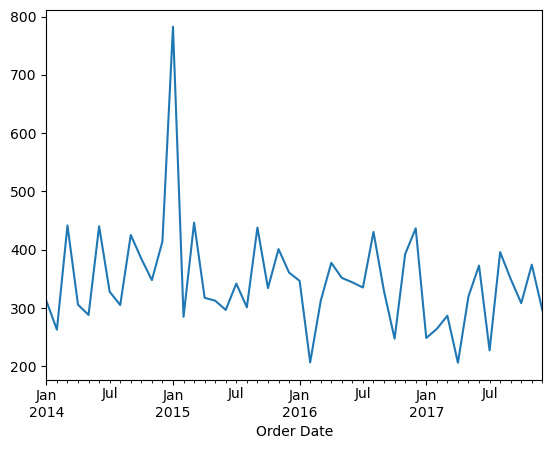

In [7]:
# Data Visualization
sales_data.plot()

### Data Decomposition 

Interpretation : Furniture data shows downword trend and it also has seasonal component. 


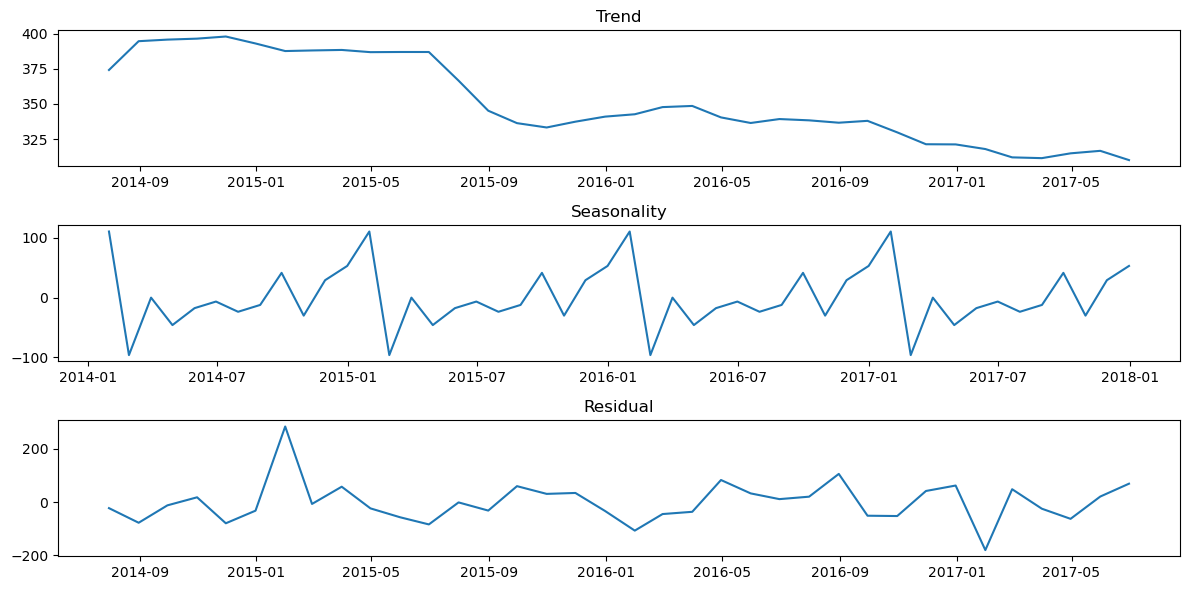

In [8]:
"""Plotting different components of the resample data"""

#Seasonal decompose tells us what components are available in time series data

result = seasonal_decompose(sales_data, model='additive')
fig,ax = plt.subplots(3,1, figsize=(12,6))

plt.subplot(311)
plt.plot(result.trend,label=True)
plt.title("Trend")

plt.subplot(312)
plt.plot(result.seasonal,label=True)
plt.title("Seasonality")

plt.subplot(313)
plt.plot(result.resid,label=True)
plt.title("Residual")

plt.tight_layout()

print("Interpretation : Furniture data shows downword trend and it also has seasonal component. ")

### Check for stationarity 

In [9]:
# ADF test to determine data stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return(msg)

In [10]:
# checking if the data is stationary
checkStationarity(sales_data)

'pvalue=9.09339851000658e-10. Data is Stationary. Proceed to model building'

### Data splitting into train and test 

In [11]:
# splitting the data into train and test
ss = int(0.7 * len(sales_data))

train_df = sales_data.iloc[:ss]
test_df = sales_data.iloc[ss:]
print("train = {}, test = {}".format(len(train_df), len(test_df)))

train = 33, test = 15


### ACF & PACF Plot

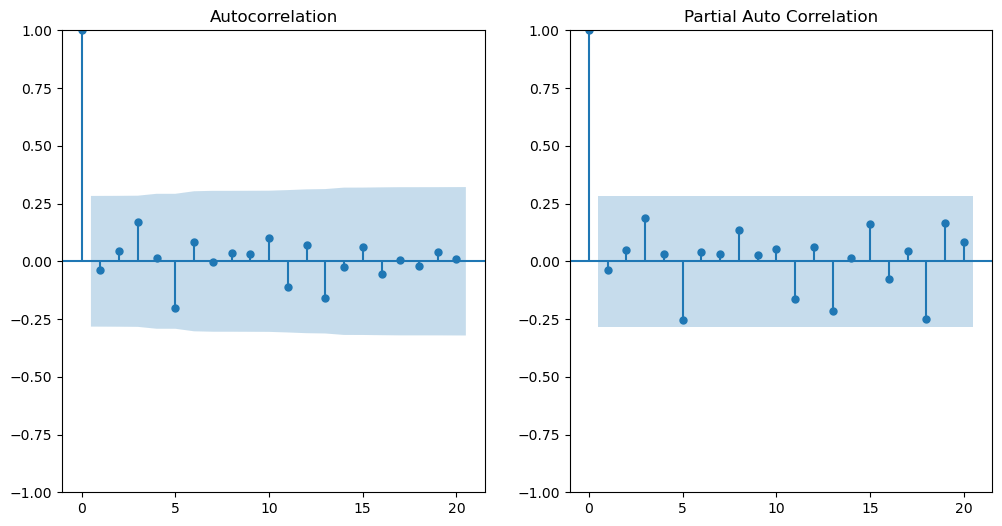

Interpretation : Significant Lag values are p : 0 and q : 0


In [12]:
# ACF and PACF plots
ROWS = 1; COLS = 2
fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6))
plot_acf(furniture_df['Sales'], lags=20, ax=ax[0]);
plt.title("Auto Correlation")

plot_pacf(furniture_df['Sales'], lags=20, ax=ax[1]);
plt.title("Partial Auto Correlation")

plt.show()

print("Interpretation : Significant Lag values are p : 0 and q : 0")

### Model Building : ARIMA 

In [13]:
# building model
# starting with an initial value of p,q as [0,0] 
# d = 0 (since data is stationary)

p=0;q=0;d=0

m1=ARIMA(sales_data, order=(p,d,q)).fit()

# model summary
print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                          ARIMA   Log Likelihood                -283.519
Date:                Sun, 17 Sep 2023   AIC                            571.039
Time:                        18:11:40   BIC                            574.781
Sample:                    01-31-2014   HQIC                           572.453
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        346.4787     17.318     20.007      0.000     312.536     380.422
sigma2      7906.3641    901.084      8.774      0.000    6140.272    9672.456
Ljung-Box (L1) (Q):                   0.08   Jarque-

In [14]:
# assuming values of p,q as [1,1] 
# d = 0 (since data is stationary)

p=1;q=1;d=0;m=12

m2=ARIMA(sales_data, order=(p,d,q)).fit()

# model summary
print(m2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -283.479
Date:                Sun, 17 Sep 2023   AIC                            574.958
Time:                        18:11:40   BIC                            582.443
Sample:                    01-31-2014   HQIC                           577.786
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        346.5093     17.190     20.158      0.000     312.818     380.201
ar.L1         -0.1612      4.249     -0.038      0.970      -8.489       8.166
ma.L1          0.1209      4.304      0.028      0.9

In [32]:
# auto ARIMA (to help in the selection of p,d,q)

m3 = auto_arima(sales_data, start_p=0, max_p= 2, start_q=0, max_q=8, seasonal= False, trace= True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=702.671, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=607.117, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=668.148, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=594.092, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=581.905, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=580.104, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=581.915, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=650.512, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=583.687, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=575.024, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=572.974, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=571.039, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=572.968, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.016 seconds
                               SARI

In [16]:
print("Interpretation : AIC SCore of model 1 (571.039) is lower than AIC score of model 2 (574.958) . So we will use m1 for forecasting")

Interpretation : AIC SCore of model 1 (571.039) is lower than AIC score of model 2 (574.958) . So we will use m1 for forecasting


In [33]:
# predictions
predictions = m3.predict(start=39,end=48,dynamic=True)
print('test = {}, predictions = {}'.format(len(test_df), len(predictions)))

test = 15, predictions = 10


In [34]:
# actual vs. predicted values
print("test = {}, predicted = {}".format(len(test_df), len(predictions) ))
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(test_df[i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

test = 15, predicted = 10
       actual   predicted         err
0  247.345354  346.478737  -99.133383
1  392.390479  346.478737   45.911742
2  436.651369  346.478737   90.172632
3  248.501333  346.478737  -97.977404
4  264.089900  346.478737  -82.388837
5  286.669600  346.478737  -59.809137
6  206.044502  346.478737 -140.434235
7  319.953928  346.478737  -26.524809
8  372.717386  346.478737   26.238649
9  227.173500  346.478737 -119.305237


In [19]:
# MSE
mean_squared_error(df_res.actual,df_res.predicted)

7537.858652729194

<AxesSubplot:>

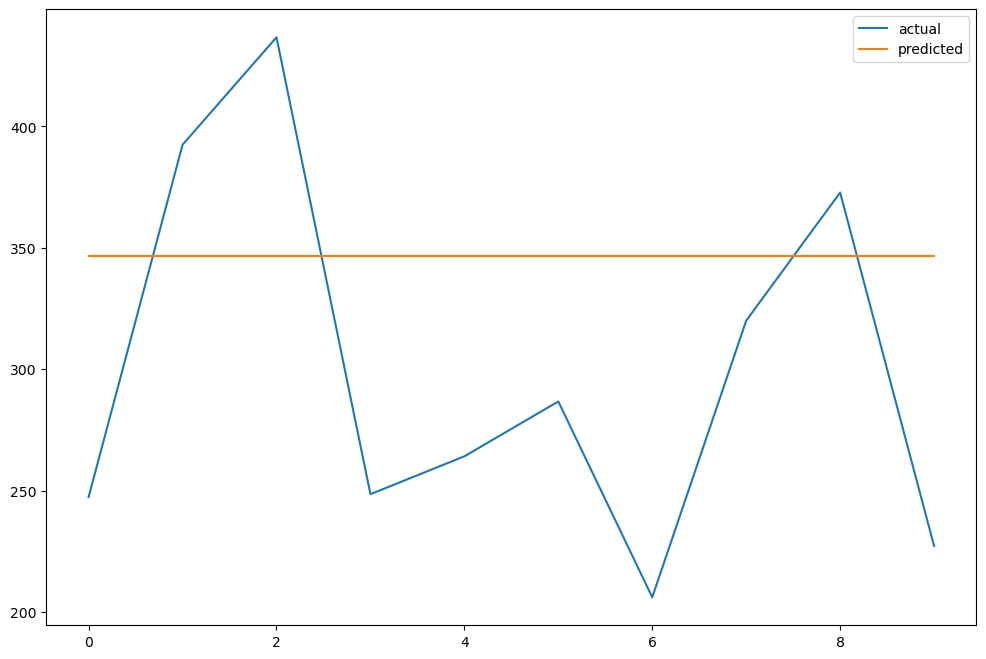

In [20]:
# Actual vs Predicted Plot
df_res[['actual','predicted']].plot(figsize=(12,8))

In [21]:
# forecasting into the future
fcast = m1.predict(start=len(sales_data), end=len(sales_data)+20).rename('Forecast')
print(fcast)

2018-01-31    346.478733
2018-02-28    346.478733
2018-03-31    346.478733
2018-04-30    346.478733
2018-05-31    346.478733
2018-06-30    346.478733
2018-07-31    346.478733
2018-08-31    346.478733
2018-09-30    346.478733
2018-10-31    346.478733
2018-11-30    346.478733
2018-12-31    346.478733
2019-01-31    346.478733
2019-02-28    346.478733
2019-03-31    346.478733
2019-04-30    346.478733
2019-05-31    346.478733
2019-06-30    346.478733
2019-07-31    346.478733
2019-08-31    346.478733
2019-09-30    346.478733
Freq: M, Name: Forecast, dtype: float64


<AxesSubplot:xlabel='Order Date'>

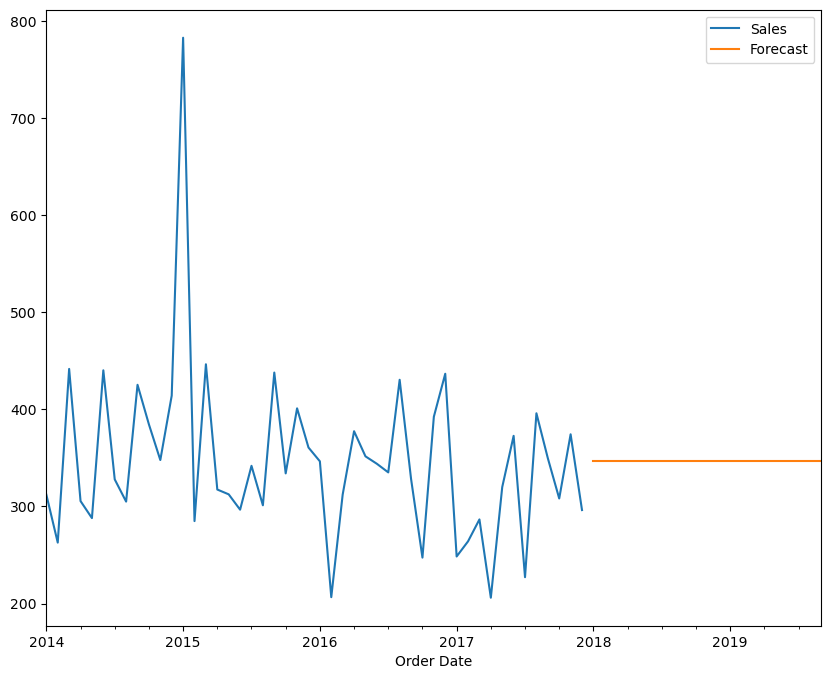

In [22]:
# Plotting forecasted values
sales_data.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True)

### Model Building : SARIMAX 

In [23]:
# building model
# seasonal_order = (p,d,q,12 = month)

# starting with an initial value of p,q as [0,0] 
# d = 0 (since data is stationary)
# seasonal_order = 12 (since it is monthly data)

p=0;q=0;d=0;m=12

m1=SARIMAX(sales_data, order=(p,d,q), seasonal_order=(p,d,q,m)).fit()

# model summary
print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                        SARIMAX   Log Likelihood                -350.335
Date:                Sun, 17 Sep 2023   AIC                            702.671
Time:                        18:11:43   BIC                            704.542
Sample:                    01-31-2014   HQIC                           703.378
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.28e+05   5.75e+04      2.226      0.026    1.53e+04    2.41e+05
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               229.60
Prob(Q):                              0.78   Pr

In [24]:
# assuming values of p,q as [1,1] 
# d = 0 (since data is stationary)
# seasonal_order = 12 (since it is monthly data)

p=1;q=1;d=0;m=12

m2=SARIMAX(sales_data, order=(p,d,q), seasonal_order=(p,d,q,m)).fit()

# model summary
print(m2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -286.987
Date:                            Sun, 17 Sep 2023   AIC                            583.974
Time:                                    18:11:43   BIC                            593.330
Sample:                                01-31-2014   HQIC                           587.510
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9990      0.053     18.858      0.000       0.895       1.103
ma.L1         -0.9283      0.264   

In [25]:
print("Interpretation : AIC score of model 2 is lower than model 1. We will forcast using model 2")

Interpretation : AIC score of model 2 is lower than model 1. We will forcast using model 2


In [26]:
# predictions 
predictions = m2.predict(start=39,end=48,dynamic=True)
print('test = {}, predictions = {}'.format(len(test_df), len(predictions)))

test = 15, predictions = 10


In [27]:
# actual vs. predicted values
print("test = {}, predicted = {}".format(len(test_df), len(predictions) ))
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(test_df[i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

test = 15, predicted = 10
       actual   predicted         err
0  247.345354  335.110228  -87.764874
1  392.390479  333.085126   59.305353
2  436.651369  338.364421   98.286948
3  248.501333  335.227662  -86.726328
4  264.089900  336.575801  -72.485901
5  286.669600  342.923682  -56.254082
6  206.044502  333.523761 -127.479258
7  319.953928  340.853495  -20.899567
8  372.717386  343.752281   28.965105
9  227.173500  348.153951 -120.980451


In [28]:
# MSE
mean_squared_error(df_res.actual,df_res.predicted)

6898.3305854804275

<AxesSubplot:>

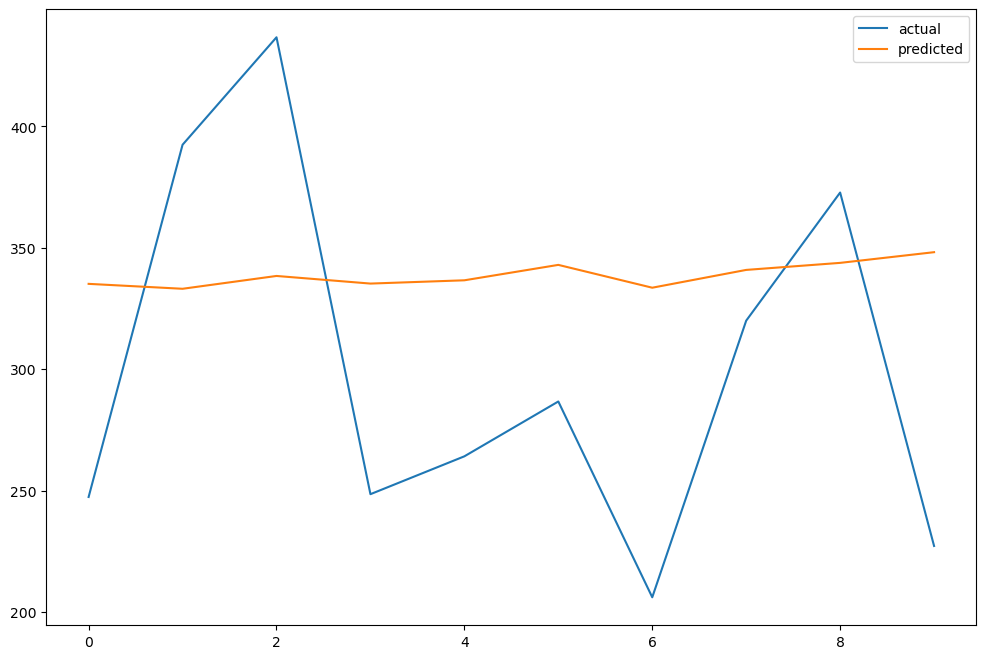

In [29]:
# Actual vs Predicted Plot
df_res[['actual','predicted']].plot(figsize=(12,8))

In [30]:
# forecasting into the future
m2 = SARIMAX(sales_data,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
fcast = m2.predict(start=len(sales_data), end=len(sales_data)+20).rename('Forecast')
print(fcast)

2018-01-31    339.854852
2018-02-28    313.281587
2018-03-31    331.816810
2018-04-30    320.736862
2018-05-31    323.411587
2018-06-30    330.584557
2018-07-31    321.756979
2018-08-31    329.853854
2018-09-30    334.061260
2018-10-31    323.453685
2018-11-30    333.116371
2018-12-31    332.757381
2019-01-31    338.734927
2019-02-28    312.345840
2019-03-31    330.750401
2019-04-30    319.746497
2019-05-31    322.401263
2019-06-30    329.522880
2019-07-31    320.755628
2019-08-31    328.794703
2019-09-30    332.971459
Freq: M, Name: Forecast, dtype: float64


<AxesSubplot:xlabel='Order Date'>

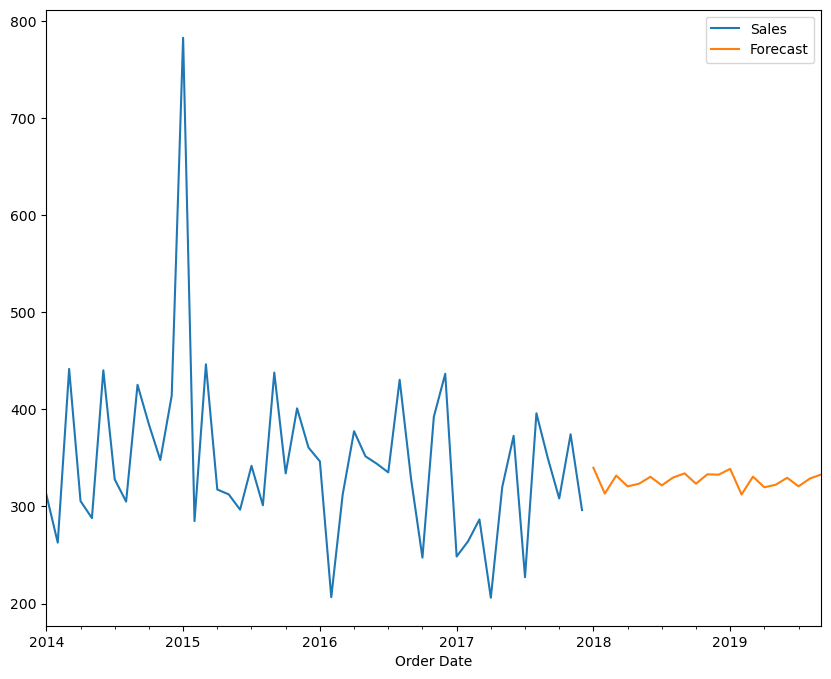

In [31]:
# Plotting forecasted values
sales_data.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True)

### Conclusion :
    
1. Furniture Sales data has seasonal component. 
2. MSE (Mean Square Error) of SARIMA model with seasonal component p,q,d,m as 1,1,0,12 is 6898.33.
3. MSE (Mean Square Error) of ARIMA model with components p,q,d as 0,0,0 is 7537.85.
4. Hence SARIMA model is better than ARIMA model for future forecasting of Furniture Sales